In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Exponential RV

**Used to model:** Lifetime of an electrical device, service time or time between arrivals in a queue, distance between mutations on a DNA strand, monthly and annual maximum values of daily rainfall 

Obtainable as a limit of Geometric random variables

Single parameter. Typically use $\lambda$, but some books use $\mu=1/\lambda$

**Density Function**
$$
f_X(x)=
\begin{cases}
\lambda e^{-\lambda x}, & x \ge 0 \\
0, & x < 0 
\end{cases}
$$

(or)
$$
f_X(x)=
\begin{cases}
\frac{1}{\mu} e^{-x/\mu}, & x \ge 0 \\
0, & x < 0 
\end{cases}
$$

We will use the first form because it is more common and simpler

In [12]:
?stats.expon

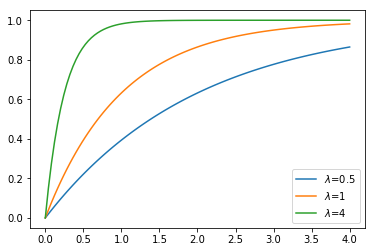

In [13]:
# WARNING!!! lambda is a keyword in Python, so we can't use it
# as a variable name
x=np.linspace(0,4,100)
for lam in [0.5, 1, 4]:
    X=stats.expon(scale=1/lam) # See help page
    plt.plot(x,X.cdf(x),label="$\lambda$="+str(lam))
plt.legend()

**Distribution Function**

See board!

## Limit of Binomial Random Variables

If the limit of properly chosen Geometric RVs is an Exponential RV, what is the limit of Binomial RVs?

Let's consider a sequence of binomial random variables with 4, 20, and 40, and 200 trials. Then divide the values by 1, 5, 10 and 50, so that the values stay centered around the same range:

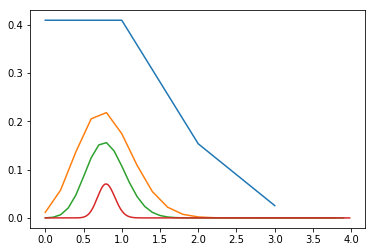

In [4]:
for scale in [1,5,10, 50]:
    N=4*scale
    indices=range(N)
    vals=np.array(indices)/scale
    B=stats.binom(N,0.2)
    plt.plot(vals,B.pmf(indices))

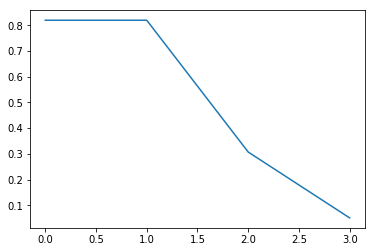

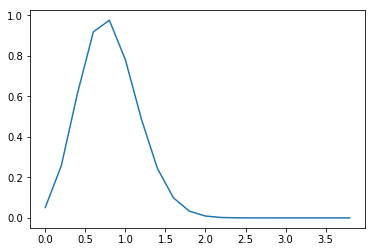

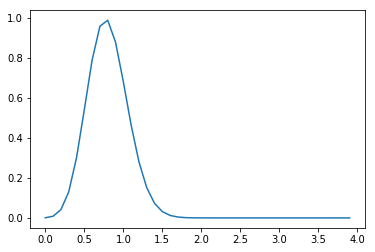

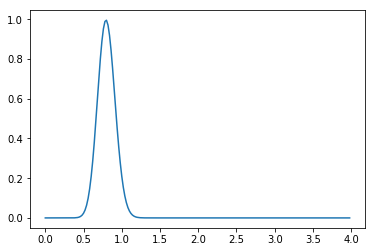

In [5]:
for scale in [1,5,10, 50]:
    #for scale in [1,10,100, 1000]:
    N=4*scale
    indices=range(N)
    vals=np.array(indices)/scale
    B=stats.binom(N,0.2)
    plt.figure()
    plt.plot(vals,np.sqrt(N)*B.pmf(indices))

What do you observe?

1. The curves become smooth and "bell-like"

1. The width of the "bell" gets smaller as we increase the number of Bernoulli trials

**Why?** We focus on observation 1 first

Recall that the Binomial RV is the sum of independent Bernoulli RVs. Maybe we we a similiar phenomena with other RVs?

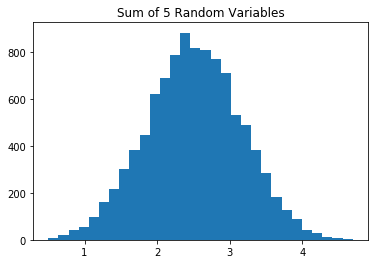

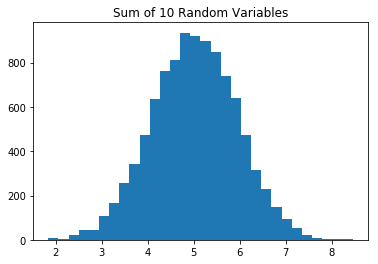

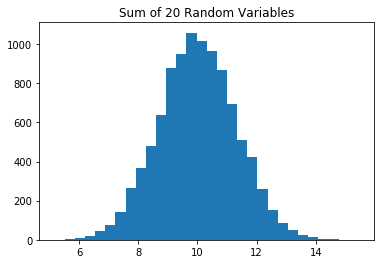

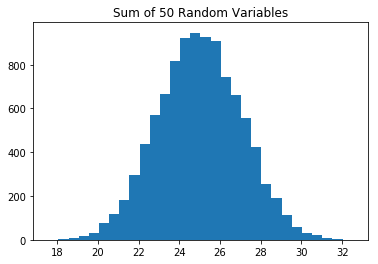

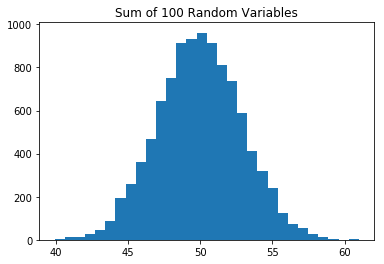

In [6]:
U=stats.uniform.rvs(size=(10000,100))
for i in [5,10,20,50,100]:
    Ui=np.sum(U[:,0:i],axis=1)
    plt.hist(Ui,bins=30)
    plt.title("Sum of "+str(i)+" Random Variables")
    plt.show()

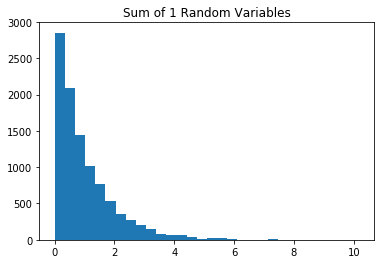

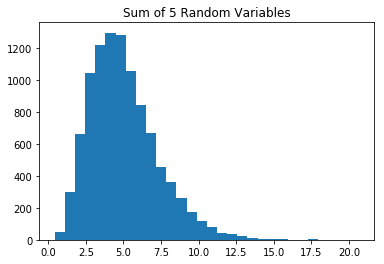

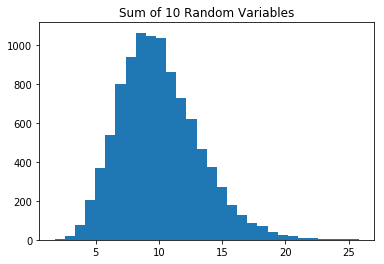

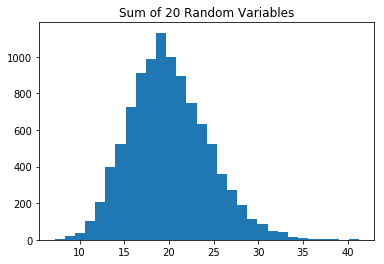

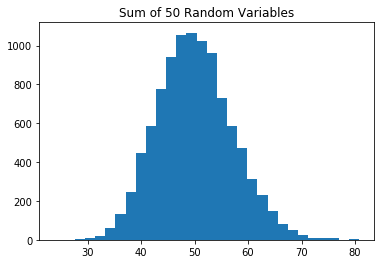

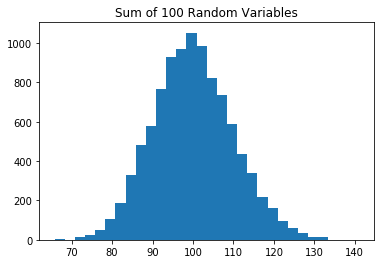

In [7]:
X=stats.expon.rvs(size=(10000,100))
for i in [1,5,10,20,50,100]:
    Xi=np.sum(X[:,0:i],axis=1)
    plt.hist(Xi,bins=30)
    plt.title("Sum of "+str(i)+" Random Variables")
    plt.show()

## Central Limit Theorem

The Central Limit Theorem (CLT) says that the average of a large number of almost any type of random variables will have the same type of distribution, called *Gaussian* or *Normal*.

The density function for a Gaussian random variable has a somewhat complicated form:
  \begin{eqnarray*}
      f_X(x) = 
      \frac{1}{\sqrt{2 \pi \sigma^2}}
      \exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\},
    \end{eqnarray*}
    with parameters (mean) $\mu$ and (variance) $\sigma^2 \ge 0$. 
    
Sometimes Normal is used to refer to the random variable that has parameters $\mu=0$ and $\sigma^2=1$, so we will use the term Gaussian  to refer to any random variable with this density function. 

(Also, "Gaussian" is more common in ECE. "Normal" is more common in Statistics and Math.)

In [8]:
?stats.norm

In [9]:
G1=stats.norm(0,1)

G2=stats.norm(10,3)

G3=stats.norm(-5,0.3)

Text(0, 0.5, 'Density function, $f_X(x)$')

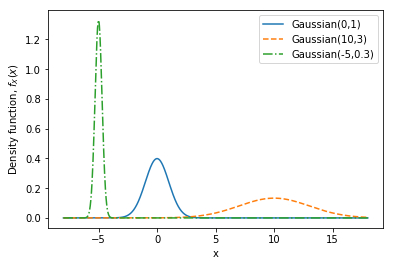

In [10]:

x=np.linspace(-8,18,1000)
plt.plot(x,G1.pdf(x),label='Gaussian(0,1)')
plt.plot(x,G2.pdf(x),'--',label='Gaussian(10,3)')
plt.plot(x,G3.pdf(x),'-.',label='Gaussian(-5,0.3)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density function, $f_X(x)$')

Text(0, 0.5, 'Distribution function, $F_X(x)$')

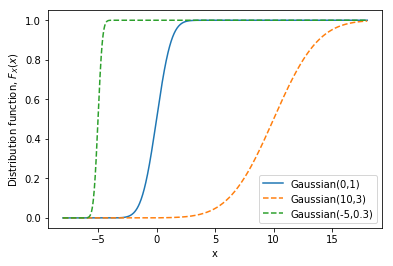

In [11]:
x=np.linspace(-8,18,1000)
plt.plot(x,G1.cdf(x),label='Gaussian(0,1)')
plt.plot(x,G2.cdf(x),'--',label='Gaussian(10,3)')
plt.plot(x,G3.cdf(x),'--',label='Gaussian(-5,0.3)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Distribution function, $F_X(x)$')